# Stock Investment Model Testing

This notebook tests the Stock Investment Evaluation Model implementation.

2025-03-08 08:12:20,935 - backend.models.risk_profile_examples - INFO - Completed analysis for AAPL with low_risk risk profile
2025-03-08 08:12:20,938 - backend.models.risk_profile_examples - INFO - Completed analysis for AAPL with medium_risk risk profile
2025-03-08 08:12:20,940 - backend.models.risk_profile_examples - INFO - Completed analysis for AAPL with high_risk risk profile


Setup complete!

Investment Recommendations by Risk Profile:

LOW_RISK RISK PROFILE:
Recommendation: Buy
Confidence Level: Moderate to High
Suggested Action: Consider standard position size
Investment Score: 0.73
Risk Notes:
- High price volatility detected

MEDIUM_RISK RISK PROFILE:
Recommendation: Strong Buy
Confidence Level: High
Suggested Action: Consider significant position within risk limits
Investment Score: 0.92
Risk Notes:
- High price volatility detected

HIGH_RISK RISK PROFILE:
Recommendation: Strong Buy
Confidence Level: High
Suggested Action: Consider significant position within risk limits
Investment Score: 1.00
Risk Notes:
- High price volatility detected


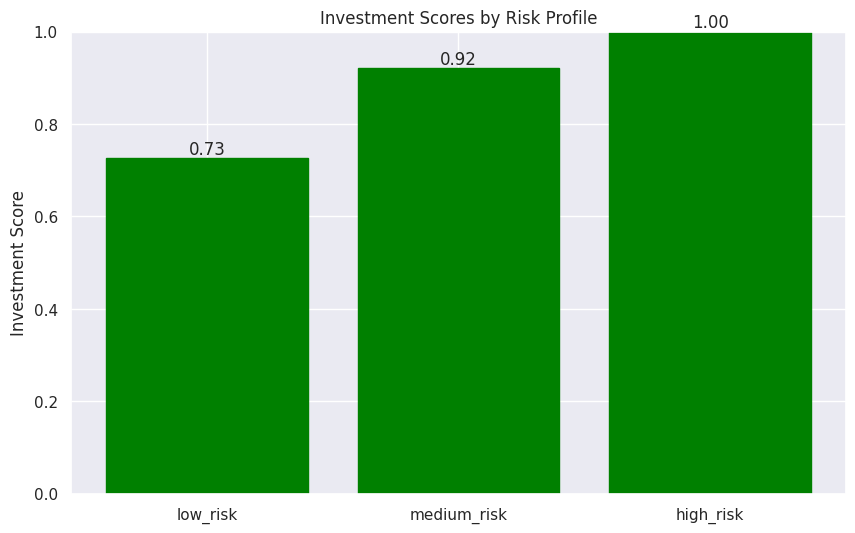

In [15]:
# First cell - imports and setup
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Add project root to path
project_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import our models
from backend.models.rating_models import RatingModel
from backend.models.data_loader import DataLoader

# Set up plotting
plt.style.use('ggplot')
sns.set_theme()
%matplotlib inline

# Initialize our data loader and model
loader = DataLoader()
model = RatingModel()
print("Setup complete!")

# Import and run tests
from backend.models.test_rating_models import test_risk_profiles, plot_risk_profile_comparison

results = test_risk_profiles()
plot_risk_profile_comparison(results)

## 1. Generate Stock Data for Testing

In [16]:
def generate_stock_data(ticker='AAPL', period='4y'):
    """
    Generate stock data for testing using DataLoader.
    
    Args:
        ticker: Stock ticker symbol
        period: Time period to fetch
        
    Returns:
        Dictionary with stock data formatted for RatingModel
    """
    return loader.get_rating_model_data(ticker, period)

In [17]:
def generate_market_data():
    """
    Generate market data for testing using DataLoader.
    
    Returns:
        Dictionary with market data
    """
    return loader.get_market_data()

In [18]:
def generate_projections(ticker='AAPL'):
    """
    Generate growth projections for testing.
    
    Args:
        ticker: Stock ticker symbol
        
    Returns:
        Dictionary with growth projections
    """
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        growth = info.get('earningsGrowth', 0.1)
    except:
        growth = 0.1  # 10% as fallback
    
    # Create projections dictionary
    projections = {
        'earnings_growth': growth
    }
    
    return projections

## 2. Test the Model with Different Stocks

In [19]:
def test_model_with_stocks(tickers=['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']):
    """
    Test the model with different stocks.
    
    Args:
        tickers: List of stock ticker symbols
        
    Returns:
        DataFrame with results
    """
    # Get market data (same for all stocks)
    market_data = generate_market_data()
    
    # Evaluate each stock
    results = []
    for ticker in tickers:
        # Get stock data
        stock_data = generate_stock_data(ticker)
        
        # Generate simple growth projections (could be enhanced)
        projections = {'earnings_growth': 0.1}  # 10% growth assumption
        
        # Evaluate stock
        evaluation = model.evaluate_stock(stock_data, market_data, projections)
        evaluation['ticker'] = ticker
        results.append(evaluation)
    
    # Convert to DataFrame
    df_results = pd.DataFrame(results)
    
    # Add components as columns
    for component, values in zip(df_results['components'], df_results.index):
        for key, value in component.items():
            df_results.loc[values, key] = value
    
    # Drop the components column
    df_results = df_results.drop('components', axis=1)
    
    return df_results

In [20]:
# Test with a set of popular stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NFLX', 'NVDA']
results = test_model_with_stocks(tickers)
results

2025-03-08 08:12:54,112 - yfinance - ERROR - $^GSPC: possibly delisted; no price data found  (period=5y)
2025-03-08 08:14:24,791 - yfinance - ERROR - $AAPL: possibly delisted; no price data found  (period=4y)


AttributeError: 'RatingModel' object has no attribute 'evaluate_stock'

## 3. Visualize Results

/tmp/ipykernel_10357/1787586099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ticker', y='investment_score', data=results_df, palette='viridis')


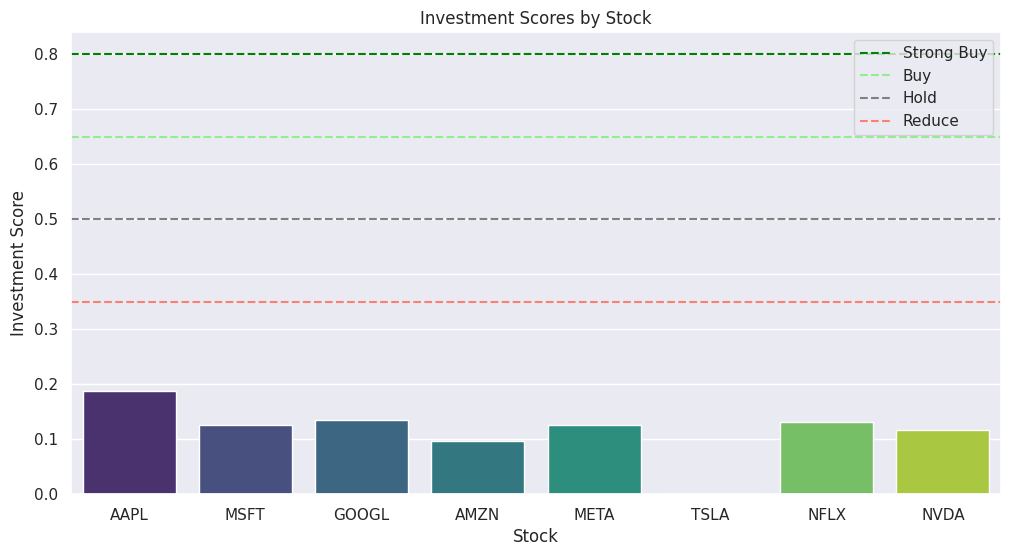

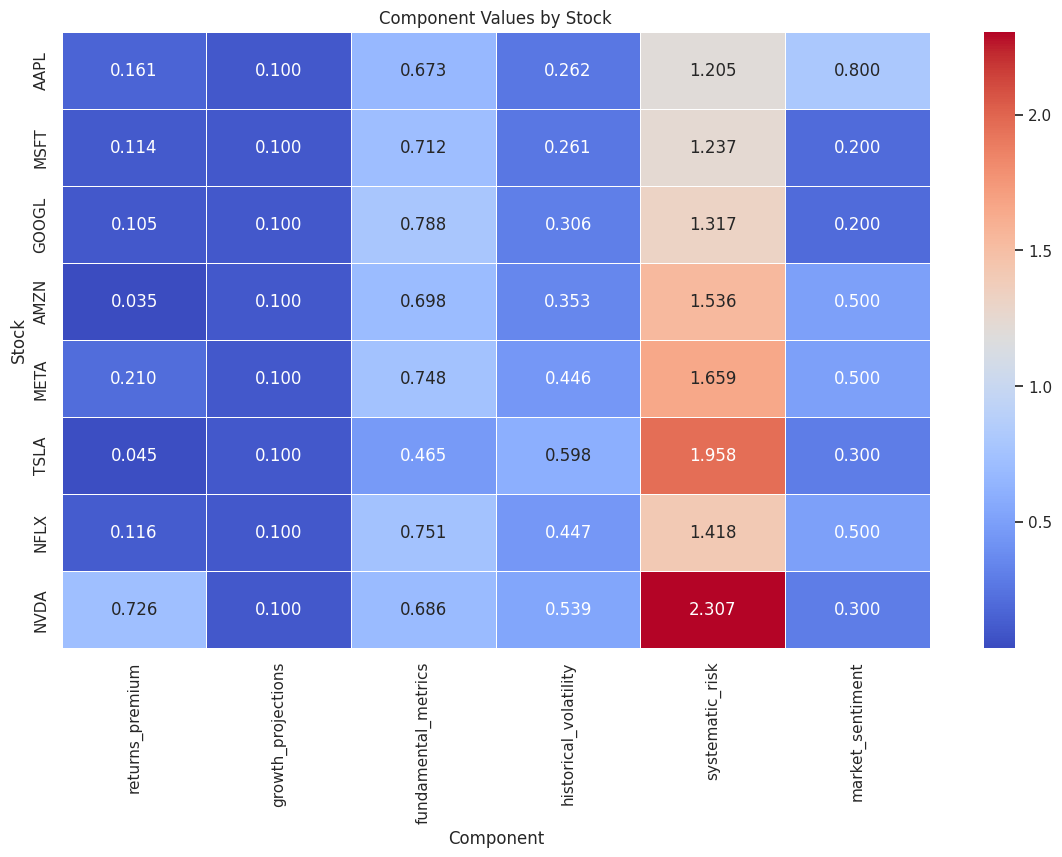

,ticker,investment_score,recommendation
0,AAPL,0.187512,Sell
2,GOOGL,0.135142,Sell
6,NFLX,0.131958,Sell
1,MSFT,0.126503,Sell
4,META,0.125892,Sell
7,NVDA,0.116494,Sell
3,AMZN,0.097399,Sell
5,TSLA,0.000000,Sell


In [55]:
def visualize_results(results_df):
    """
    Visualize model results.
    
    Args:
        results_df: DataFrame with model results
    """
    # Bar chart of investment scores
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ticker', y='investment_score', data=results_df, palette='viridis')
    plt.title('Investment Scores by Stock')
    plt.xlabel('Stock')
    plt.ylabel('Investment Score')
    plt.axhline(y=0.8, color='green', linestyle='--', label='Strong Buy')
    plt.axhline(y=0.65, color='lightgreen', linestyle='--', label='Buy')
    plt.axhline(y=0.5, color='gray', linestyle='--', label='Hold')
    plt.axhline(y=0.35, color='salmon', linestyle='--', label='Reduce')
    plt.legend()
    plt.show()
    
    # Heatmap of components
    components = ['returns_premium', 'growth_projections', 'fundamental_metrics', 
                 'historical_volatility', 'systematic_risk', 'market_sentiment']
    
    plt.figure(figsize=(14, 8))
    component_df = results_df[components].copy()
    component_df.index = results_df['ticker']
    sns.heatmap(component_df, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
    plt.title('Component Values by Stock')
    plt.ylabel('Stock')
    plt.xlabel('Component')
    plt.show()
    
    # Recommendations table
    recommendations = results_df[['ticker', 'investment_score', 'recommendation']]
    recommendations = recommendations.sort_values('investment_score', ascending=False)
    display(recommendations)

# Visualize the results
visualize_results(results)

## 4. Test with Custom Weights

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5EGSPC?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=%5EGSPC&crumb=jEnAKyEjSdb
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5EGSPC?modules=institutionOwnership%2CfundOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CinsiderTransactions%2CinsiderHolders%2CnetSharePurchaseActivity&corsDomain=finance.yahoo.com&formatted=false&crumb=jEnAKyEjSdb
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5ETNX?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=%5ETNX&crumb=jEnAKyEjSdb
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5ETNX?modules=institutionOwnership%2CfundOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CinsiderTransactions%2CinsiderHolders%2CnetSharePurchaseActivity&cors

Results with Custom Weights:


/tmp/ipykernel_10357/1787586099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ticker', y='investment_score', data=results_df, palette='viridis')


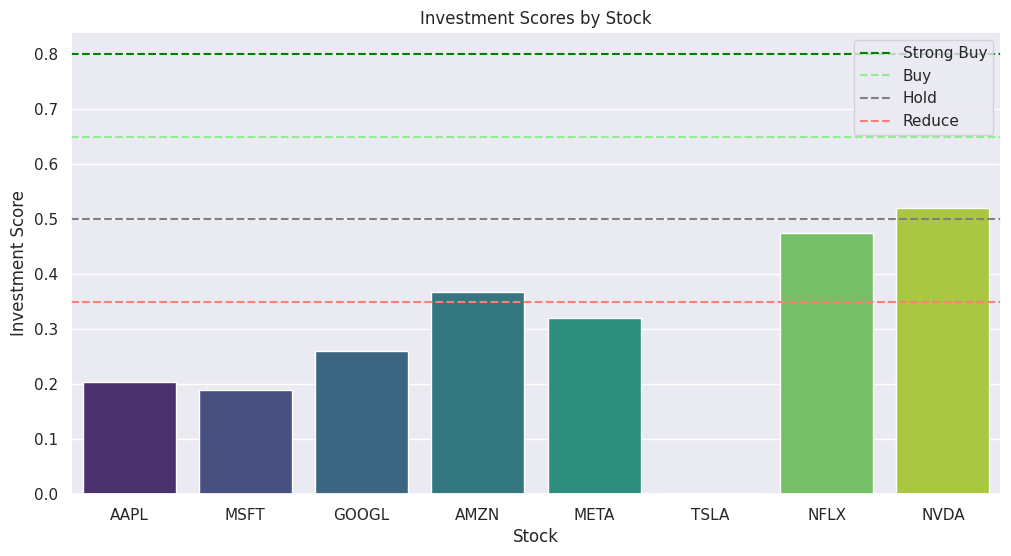

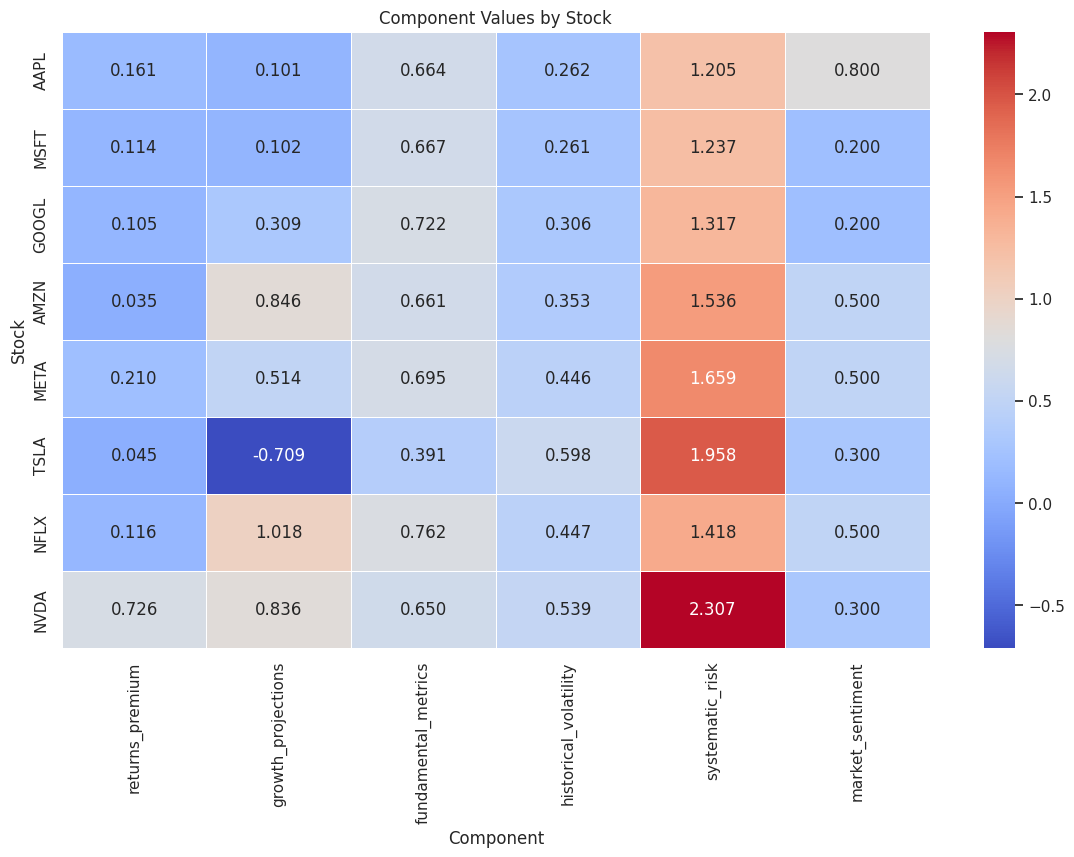

,ticker,investment_score,recommendation
7,NVDA,0.521318,Hold
6,NFLX,0.475630,Reduce
3,AMZN,0.367957,Reduce
4,META,0.320259,Sell
2,GOOGL,0.259790,Sell
0,AAPL,0.204456,Sell
1,MSFT,0.189746,Sell
5,TSLA,0.000000,Sell


In [56]:
# Create model with custom weights
custom_model = RatingModel(
    alpha=0.3,    # Higher weight on historical returns
    beta=0.3,     # Higher weight on growth
    gamma=0.3,    # Higher weight on fundamentals
    delta=0.05,   # Lower weight on volatility
    epsilon=0.05, # Lower weight on beta
    zeta=0.0,     # Ignore market sentiment
    w1=0.1,       # P/E weight
    w2=0.1,       # D/E weight
    w3=0.3,       # ROE weight
    w4=0.3,       # FCF weight
    w5=0.2        # PM weight
)

# Generate results with custom weights
custom_results = []
market_data = generate_market_data()

for ticker in tickers:
    stock_data = generate_stock_data(ticker)
    projections = generate_projections(ticker)
    evaluation = custom_model.evaluate_stock(stock_data, market_data, projections)
    evaluation['ticker'] = ticker
    custom_results.append(evaluation)

# Convert to DataFrame
df_custom = pd.DataFrame(custom_results)

# Add components as columns
for component, values in zip(df_custom['components'], df_custom.index):
    for key, value in component.items():
        df_custom.loc[values, key] = value

# Drop the components column
df_custom = df_custom.drop('components', axis=1)

# Display custom results
print("Results with Custom Weights:")
visualize_results(df_custom)

## 5. Compare Original vs Custom Weights

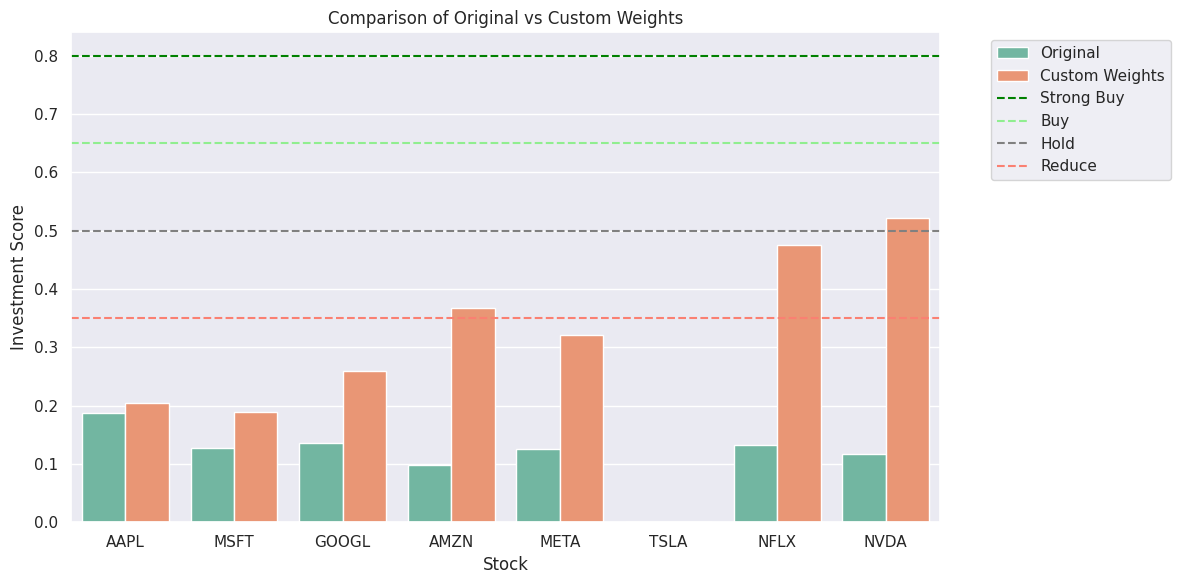

In [57]:
# Compare original vs custom
plt.figure(figsize=(12, 6))

# Create a DataFrame for comparison
compare_df = pd.DataFrame({
    'ticker': results['ticker'],
    'Original': results['investment_score'],
    'Custom Weights': df_custom['investment_score']
})

# Reshape for seaborn
compare_df = pd.melt(compare_df, id_vars=['ticker'], var_name='Model', value_name='Score')

# Plot
sns.barplot(x='ticker', y='Score', hue='Model', data=compare_df, palette='Set2')
plt.title('Comparison of Original vs Custom Weights')
plt.xlabel('Stock')
plt.ylabel('Investment Score')
plt.axhline(y=0.8, color='green', linestyle='--', label='Strong Buy')
plt.axhline(y=0.65, color='lightgreen', linestyle='--', label='Buy')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Hold')
plt.axhline(y=0.35, color='salmon', linestyle='--', label='Reduce')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 6. Sensitivity Analysis

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5EGSPC?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=%5EGSPC&crumb=jEnAKyEjSdb
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5EGSPC?modules=institutionOwnership%2CfundOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CinsiderTransactions%2CinsiderHolders%2CnetSharePurchaseActivity&corsDomain=finance.yahoo.com&formatted=false&crumb=jEnAKyEjSdb
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5ETNX?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=%5ETNX&crumb=jEnAKyEjSdb
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5ETNX?modules=institutionOwnership%2CfundOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CinsiderTransactions%2CinsiderHolders%2CnetSharePurchaseActivity&cors

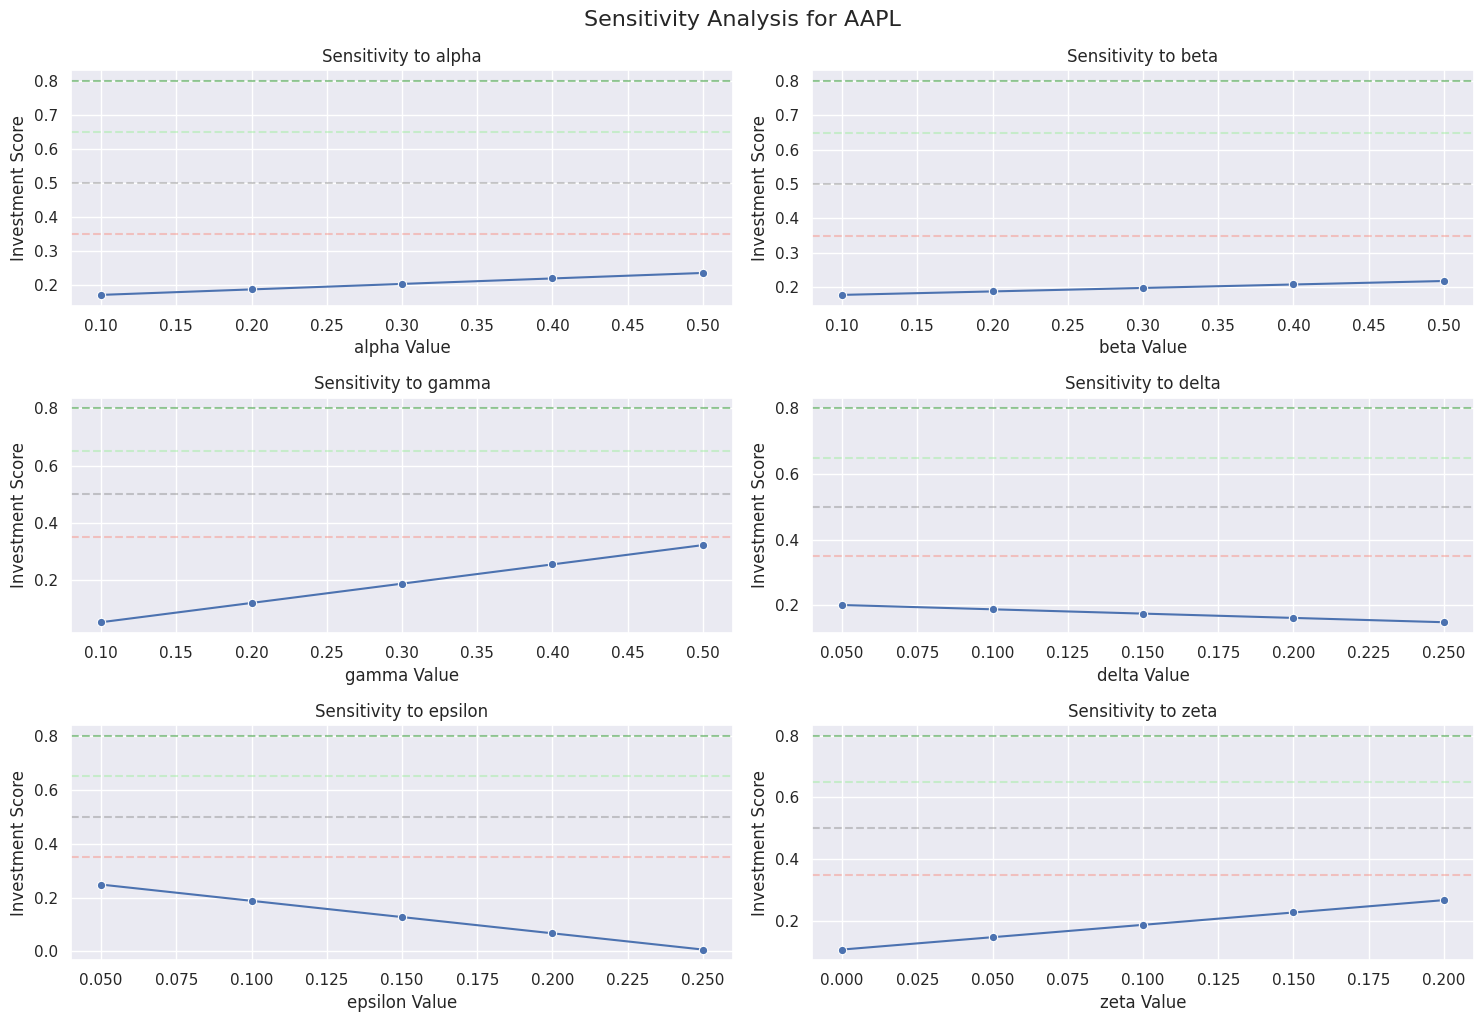

/tmp/ipykernel_10357/2714384829.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_data['rec_num'] = param_data['recommendation'].map(recommendation_map)
/tmp/ipykernel_10357/2714384829.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_data['rec_num'] = param_data['recommendation'].map(recommendation_map)
/tmp/ipykernel_10357/2714384829.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



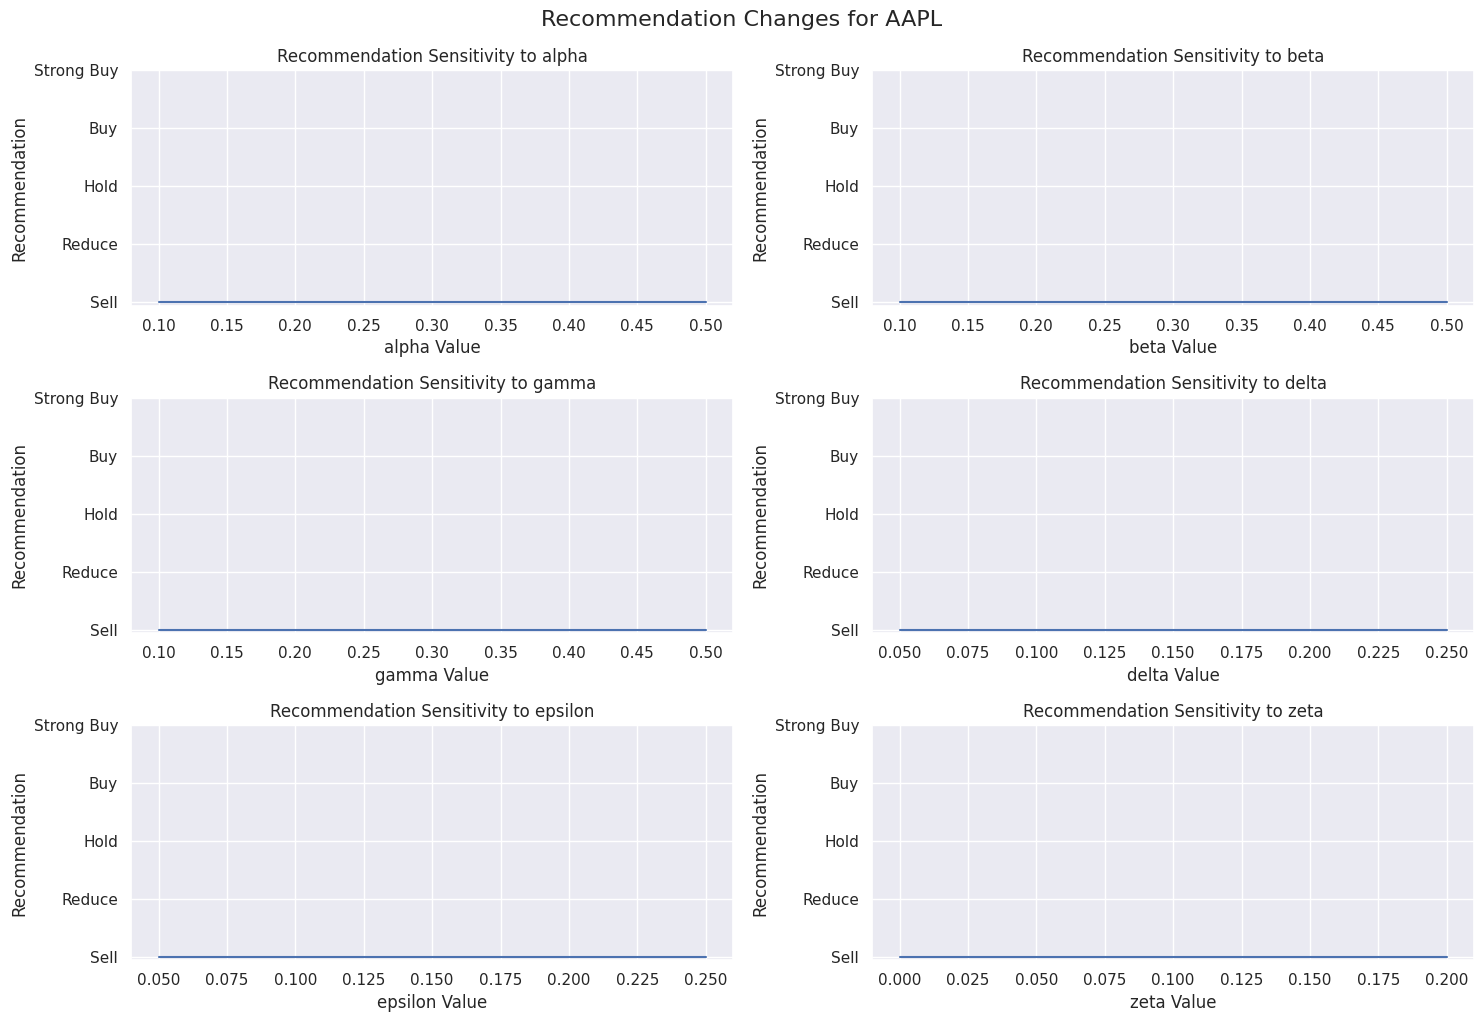

In [58]:
def visualize_sensitivity(model, ticker='AAPL'):
    """
    Visualize sensitivity analysis for a stock.
    
    Args:
        model: StockInvestmentModel instance
        ticker: Stock ticker to analyze
    """
    # Generate data
    stock_data = generate_stock_data(ticker)
    market_data = generate_market_data()
    projections = generate_projections(ticker)
    
    # Define parameter ranges to test
    param_ranges = {
        'alpha': np.linspace(0.1, 0.5, 5),
        'beta': np.linspace(0.1, 0.5, 5),
        'gamma': np.linspace(0.1, 0.5, 5),
        'delta': np.linspace(0.05, 0.25, 5),
        'epsilon': np.linspace(0.05, 0.25, 5),
        'zeta': np.linspace(0.0, 0.2, 5)
    }
    
    # Perform sensitivity analysis
    sensitivity = model.perform_sensitivity_analysis(
        stock_data, market_data, projections, param_ranges
    )
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Create a subplot for each parameter
    params = sensitivity['parameter'].unique()
    num_params = len(params)
    rows = (num_params + 1) // 2
    
    for i, param in enumerate(params):
        param_data = sensitivity[sensitivity['parameter'] == param]
        
        plt.subplot(rows, 2, i+1)
        sns.lineplot(x='value', y='investment_score', data=param_data, marker='o')
        
        # Add recommendation regions
        plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.4)
        plt.axhline(y=0.65, color='lightgreen', linestyle='--', alpha=0.4)
        plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.4)
        plt.axhline(y=0.35, color='salmon', linestyle='--', alpha=0.4)
        
        plt.title(f'Sensitivity to {param}')
        plt.xlabel(f'{param} Value')
        plt.ylabel('Investment Score')
    
    plt.tight_layout()
    plt.suptitle(f'Sensitivity Analysis for {ticker}', fontsize=16, y=1.02)
    plt.show()
    
    # Show how recommendation changes with parameter values
    plt.figure(figsize=(15, 10))
    for i, param in enumerate(params):
        param_data = sensitivity[sensitivity['parameter'] == param]
        
        plt.subplot(rows, 2, i+1)
        # Convert recommendation to numeric
        recommendation_map = {
            'Strong Buy': 5, 'Buy': 4, 'Hold': 3, 'Reduce': 2, 'Sell': 1
        }
        param_data['rec_num'] = param_data['recommendation'].map(recommendation_map)
        
        # Use step plot to show recommendation changes
        plt.step(param_data['value'], param_data['rec_num'], where='mid')
        plt.yticks([1, 2, 3, 4, 5], ['Sell', 'Reduce', 'Hold', 'Buy', 'Strong Buy'])
        
        plt.title(f'Recommendation Sensitivity to {param}')
        plt.xlabel(f'{param} Value')
        plt.ylabel('Recommendation')
        
    plt.tight_layout()
    plt.suptitle(f'Recommendation Changes for {ticker}', fontsize=16, y=1.02)
    plt.show()

# Run sensitivity analysis for Apple
model = RatingModel()
visualize_sensitivity(model, 'AAPL')